## Ejercicios Api Twitter

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from time import sleep

import tweepy

In [3]:
consumer_key        = "eChpsVGdzR3v1B4IucU9FCmJN"
consumer_secret     = "SjMczFtbHM8pfF4xbZSVihCivYRZmMZGdFC9btFKguUjGxaQg7"
access_token        = "55685590-BuFJZqrWcN3rL3kN0DlwH2SZimWhDSRdaulvRQexh"
access_token_secret = "asKnk5LavSOWlRwmDrDtv05i5Q1ABB7sj6iyWGg5EFZHB"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Ejercicio 1:
- Obtén 2 artículos de 20minutos.com y en 2 tweets publica:
1. El titulo del articulo, la fecha, el autor y la categoría con la imagen del articulo.
2. **TITULO ARTICULO - CATEGORIA - FECHA - AUTOR - IMAGEN**

### Ejercicio 2:
- Realiza una búsqueda de los siguientes hashtags y obtén 5 tweets por cada hashtag: 
    - **#MachineLearning**
    - **#DeepLearning**
    - **#Python**
    - **#RegularExpressions**
    - **#JSON**

In [4]:
hashtags = ["#MachineLearning", "#DeepLearning", "#Python", "#RegularExpressions", "#JSON"]

lista_hashtags = list()

for h in hashtags:
    lista_hashtags.extend(api.search_tweets(q = h, count = 5, tweet_mode = "extended" ))

len(lista_hashtags)

23

### Ejercicio 3:
- Obtén la siguiente información de cada tweet del ejercicio anterior: 
    - **Tweet**
    - **Name**
    - **Location**
    - **Id**
    - **Date**
    - **Re tweets**
    - **Fav**

Guarda esta información en un **`DataFrame`**.

In [9]:
datos = list()

for tweet in lista_hashtags:
    texto    = tweet.full_text
    usuario  = tweet.user.name
    location = tweet.user.location
    id_      = tweet.id
    fecha    = tweet.created_at
    retweet  = tweet.retweet_count
    favorito = tweet.favorite_count
    
    datos.append([texto, usuario, location, id_, fecha, retweet, favorito])
    
len(datos)

23

In [10]:
df = pd.DataFrame(datos, columns = ["text", "user", "location", "tweet_id", "date", "retweet", "favorite"])

df.head(3)

,text,user,location,tweet_id,date,retweet,favorite
0,This is one of my favorites from my abandoned ...,Jacob F Bailey,"Oregon, US",1499327767137062912,2022-03-03 10:16:10+00:00,0,0
1,RT @SpotLyf: Presenting India's first-ever pla...,HubOfML,Germany,1499327765430083585,2022-03-03 10:16:10+00:00,6,0
2,RT @SpotLyf: Presenting India's first-ever pla...,Curious Luke,Switzerland,1499327739454709761,2022-03-03 10:16:03+00:00,6,0


### Ejercicio 4:
- Obtén todos los tweets de **`20_minutos`** y crea un **`DataFrame`** con las columnas **`text, date, id, rt, fav, year, month, weekday, hour`**.

In [13]:
tweets = tweepy.Cursor(api.user_timeline, screen_name = "20m").items()

datos = list()

for tweet in tweets:
    texto    = tweet.text
    fecha    = tweet.created_at
    id_      = tweet.id
    retweet  = tweet.retweet_count
    favorito = tweet.favorite_count
    
    datos.append([texto, id_, fecha, retweet, favorito])

df_20minutos = pd.DataFrame(datos, columns = ["text", "tweet_id", "date", "retweet", "favorite"])

df_20minutos.head(3)

,text,tweet_id,date,retweet,favorite
0,Viaja 5.000 km desde Zaragoza para salvar a su...,1499330103574253572,2022-03-03 10:25:27+00:00,0,1
1,La próxima serie de Matt Reeves ('The Batman')...,1499328918049984512,2022-03-03 10:20:44+00:00,1,2
2,Suecia denuncia que la incursión de cuatro caz...,1499327663525318656,2022-03-03 10:15:45+00:00,2,5


In [15]:
df_20minutos.shape

(1380, 5)

In [21]:
df_20minutos["year"] = df_20minutos["date"].apply(lambda x : x.year)

df_20minutos["month"] = df_20minutos["date"].apply(lambda x : x.month)

df_20minutos["weekday"] = df_20minutos["date"].apply(lambda x : x.weekday)

df_20minutos["hour"] = df_20minutos["date"].apply(lambda x : x.hour)

df_20minutos.head()

,text,tweet_id,date,retweet,favorite,year,month,weekday,hour
0,Viaja 5.000 km desde Zaragoza para salvar a su...,1499330103574253572,2022-03-03 10:25:27+00:00,0,1,2022,3,3,10
1,La próxima serie de Matt Reeves ('The Batman')...,1499328918049984512,2022-03-03 10:20:44+00:00,1,2,2022,3,3,10
2,Suecia denuncia que la incursión de cuatro caz...,1499327663525318656,2022-03-03 10:15:45+00:00,2,5,2022,3,3,10
3,📢 #ÚltimaHora | Iñaki Urdangarin obtiene la li...,1499326547433504770,2022-03-03 10:11:19+00:00,5,7,2022,3,3,10
4,¿Por qué Batman repite siempre los mismos vill...,1499326347587592196,2022-03-03 10:10:32+00:00,0,1,2022,3,3,10


### Ejercicio 5:
- Obtén una lista de los hashtags del conjunto de tweets y cuentalos.

In [25]:
import re
from collections import Counter

hashtags = list()

for i in range(df_20minutos.shape[0]):
    texto = df_20minutos.loc[i, "text"]
    
    resultados = re.findall(r"#\w+", texto)
    
    hashtags.extend(resultados)
    
Counter(hashtags).most_common()

[('#Directo', 30),
 ('#ÚltimaHora', 27),
 ('#Opiniones', 17),
 ('#20decompras', 15),
 ('#Ampliación', 9),
 ('#Fotogalería', 7),
 ('#PedroSánchezTD', 7),
 ('#Entrevista', 4),
 ('#MADRID', 3),
 ('#Ucrania', 2),
 ('#20deCompras', 2),
 ('#Vídeo', 2),
 ('#MWC22', 2),
 ('#Actualización', 2),
 ('#crossover', 1),
 ('#Actualizacion', 1),
 ('#coronavirus', 1),
 ('#Zaragoza', 1),
 ('#CopaDelRey', 1),
 ('#BulletTrain', 1),
 ('#Kiev', 1),
 ('#CÓRDOBA', 1),
 ('#COFOE', 1),
 ('#MarceloEH', 1),
 ('#PERFIL', 1),
 ('#Lamborghini', 1),
 ('#SolesRepsolDonostia22', 1),
 ('#GuiaRepsol', 1),
 ('#SolesGuiaRepsol', 1),
 ('#AnimalesFantásticosLosSecretosDeDumbledore', 1),
 ('#Avanzadoras', 1),
 ('#Opinión', 1),
 ('#ÚtimaHora', 1),
 ('#Przemysl', 1),
 ('#VÍDEO', 1),
 ('#Obolon', 1),
 ('#perros', 1),
 ('#Urgente', 1)]

### Ejercicio 6:
- Obtén el número de tweets por año, por mes de cada año, por día de la semana y la dispersión por horario.

In [26]:
df_20minutos["year"].unique()

array([2022], dtype=int64)

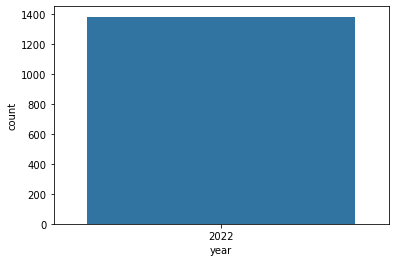

In [29]:
# Año

sns.countplot(x = df_20minutos["year"])
plt.show()

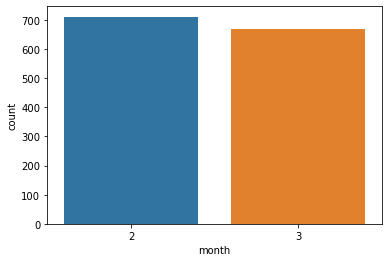

In [30]:
sns.countplot(x = df_20minutos["month"])
plt.show()

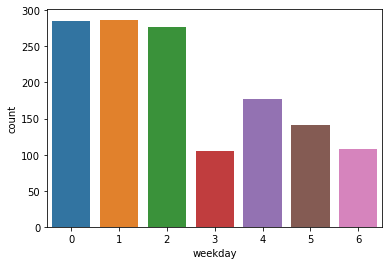

In [31]:
sns.countplot(x = df_20minutos["weekday"])
plt.show()

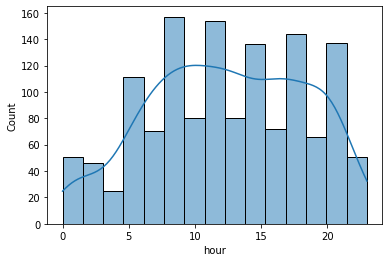

In [33]:
sns.histplot(x = df_20minutos["hour"], kde = True)
plt.show()

### Ejercicio 7:
- Cuenta el número de palabras de todos los tweets y busca las primeras 20 que más aparecen.

In [41]:
len(" ".join(df_20minutos["text"]).lower().split())

24509

In [47]:
# Lo que dijo walid

palabras = Counter(" ".join(df_20minutos["text"]).lower().split()).most_common(100)

palabras_importantes = list()

for palabra in palabras:
    if len(palabra[0]) > 4:
        palabras_importantes.append(palabra)
        
palabras_importantes

[('ucrania', 151),
 ('rusia', 101),
 ('guerra', 74),
 ('españa', 63),
 ('sobre', 61),
 ('contra', 47),
 ('putin', 40),
 ('madrid', 37),
 ('invasión', 34),
 ('euros', 32),
 ('ucrania:', 31),
 ('entre', 30),
 ('#directo', 30),
 ('desde', 29),
 ('menos', 29),
 ('sánchez', 28),
 ('#últimahora', 27),
 ('armas', 27),
 ('nuevo', 25),
 ('nueva', 24),
 ('rusos', 22),
 ('cuando', 22),
 ('febrero', 21),
 ('puede', 20),
 ('europa', 20),
 ('hacer', 20),
 ('tiene', 19),
 ('ataque', 18),
 ('todos', 17),
 ('coche', 17),
 ('#20decompras', 17),
 ('#opiniones', 17),
 ('zelenski', 17),
 ('ucranianos', 17),
 ('anuncia', 17)]

### Ejercicio 8:
- Repite el paso anterior para cada año y observa si cambian de un año a otro y sí es así, agrega a una lista las que van cambiando.

### Ejercicio 9:
- Repite los ejercicio del 4 al 8 con otra cuenta de twitter de noticias. Compara los resultados de ambas cuentas.